# EDA and Feature Engineering for Meta Data
## Import necessary libraries

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules
IN_COLAB

True

In [ ]:
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Uninstall existing versions:
#!pip uninstall numpy -y
#!pip uninstall pandas -y
#!pip uninstall tqdm -y
#!pip uninstall torch -y
#!pip uninstall scikit-plot -y
#!pip uninstall transformers -y

# Install packages:
#!pip install numpy==1.16.4
#!pip install pandas==0.25.0
#!pip install tqdm==4.43.0
#!pip install torch==1.4.0
#!pip install scikit-plot
#!pip install transformers

In [ ]:
# Python libraries
import pprint
pprint.pprint(sys.path)
import datetime as dt
import re
import pickle
from tqdm.notebook import tqdm
import os
import sys
from collections import defaultdict
from collections import Counter

# Data Science modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use('ggplot')
sns.set(style='white', context='notebook', palette='deep')

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']


In [ ]:
if IN_COLAB:
  employment_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/Employment/'
  cpi_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/CPI/'
  fed_rates_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/FEDRates/'
  fx_rates_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/FXRates/'
  gdp_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/GDP/'
  ism_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/ISM/'
  sales_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/Sales/'
  treasury_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/Treasury/'
  fomc_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/FOMC/'
  preprocessed_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/preprocessed/'
  train_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/train_data/'
  output_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/result/'
  keyword_lm_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/LoughranMcDonald/'
  glove_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/GloVe/'
  model_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/models/'
else:
  employment_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/Employment/'
  cpi_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/CPI/'
  fed_rates_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/FEDRates/'
  fx_rates_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/FXRates/'
  gdp_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/GDP/'
  ism_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/ISM/'
  sales_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/Sales/'
  treasury_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/Treasury/'
  fomc_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/FOMC/'
  preprocessed_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/preprocessed/'
  train_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/train_data/'
  output_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/result/'
  keyword_lm_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/LoughranMcDonald/'
  glove_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/GloVe/'
  model_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/models/'

In [ ]:
# Load nontext data
if IN_COLAB:
  file = open('/content/drive/My Drive/Colab Notebooks/proj2/src/data/preprocessed/nontext_data.pickle', 'rb')
  nontext_data = pickle.load(file)
  file.close()
else:
  file = open('C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/preprocessed/nontext_data.pickle', 'rb')

print(nontext_data.shape)
nontext_data.head()

(398, 57)


,unscheduled,forecast,confcall,ChairPerson,Rate,RateDiff,RateDecision,RateChanged,GDP_date,GDP_value,GDP_diff_prev,GDP_diff_year,GDPPOT_date,GDPPOT_value,GDPPOT_diff_prev,GDPPOT_diff_year,PCE_date,PCE_value,PCE_diff_prev,PCE_diff_year,CPI_date,CPI_value,CPI_diff_prev,CPI_diff_year,Unemp_date,Unemp_value,Unemp_diff_prev,Unemp_diff_year,Employ_date,Employ_value,Employ_diff_prev,Employ_diff_year,PMI_date,PMI_value,PMI_diff_prev,PMI_diff_year,NMI_date,NMI_value,NMI_diff_prev,NMI_diff_year,Rsales_date,Rsales_value,Rsales_diff_prev,Rsales_diff_year,Hsales_date,Hsales_value,Hsales_diff_prev,Hsales_diff_year,Taylor,Balanced,Inertia,Taylor-Rate,Balanced-Rate,Inertia-Rate,Taylor_diff,Balanced_diff,Inertia_diff
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1982-10-05,False,False,False,Paul Volcker,9.5,-0.5,-1,1,1982-04-01,6825.876,0.456197,-1.010549,1982-04-01,7224.140335,0.781241,2.925225,1982-08-01,47.798,0.460287,6.369058,1982-08-01,97.7,0.205128,5.965293,1982-09-01,-10.1,-0.3,-2.5,1982-09-01,89183.0,-180.0,-2294.0,1982-09-01,38.8,0.5,-3.7,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1982-09-01,481.0,18.181818,42.307692,7.718209,4.882832,7.767575,-2.281791,-5.117168,-2.232425,NaN,NaN,NaN
1982-11-16,False,False,False,Paul Volcker,9.0,-0.5,-1,1,1982-07-01,6799.781,-0.382295,-2.555898,1982-07-01,7282.431567,0.806895,3.080461,1982-09-01,47.975,0.370308,6.068981,1982-10-01,98.1,0.409417,5.032120,1982-10-01,-10.4,-0.3,-2.5,1982-10-01,88907.0,-276.0,-2473.0,1982-10-01,39.4,0.6,-0.6,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1982-10-01,480.0,-0.207900,34.831461,6.674751,3.246030,7.588095,-2.825249,-6.253970,-1.911905,-1.043459,-1.636801,-0.179480
1982-12-21,False,False,False,Paul Volcker,8.5,0.0,0,0,1982-07-01,6799.781,-0.382295,-2.555898,1982-07-01,7282.431567,0.806895,3.080461,1982-10-01,48.279,0.633663,6.110024,1982-11-01,98.0,-0.101937,4.477612,1982-11-01,-10.8,-0.4,-2.5,1982-11-01,88786.0,-121.0,-2385.0,1982-11-01,39.2,-0.2,3.1,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1982-11-01,554.0,15.416667,45.026178,6.736316,3.307596,6.728861,-1.763684,-5.192404,-1.771139,0.061565,0.061565,-0.859235
1983-01-14,False,False,True,Paul Volcker,8.5,0.0,0,0,1982-07-01,6799.781,-0.382295,-2.555898,1982-07-01,7282.431567,0.806895,3.080461,1982-11-01,48.458,0.370762,5.884409,1982-12-01,97.7,-0.306122,3.825717,1982-12-01,-10.8,0.0,-2.3,1982-12-01,88771.0,-15.0,-2124.0,1982-12-01,42.8,3.6,5.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1982-12-01,521.0,-5.956679,14.004376,6.397894,2.969174,6.779624,-2.102106,-5.530826,-1.720376,-0.338422,-0.338422,0.050763
1983-01-21,False,False,True,Paul Volcker,8.5,0.0,0,0,1982-07-01,6799.781,-0.382295,-2.555898,1982-07-01,7282.431567,0.806895,3.080461,1982-11-01,48.458,0.370762,5.884409,1982-12-01,97.7,-0.306122,3.825717,1982-12-01,-10.8,0.0,-2.3,1982-12-01,88771.0,-15.0,-2124.0,1982-12-01,42.8,3.6,5.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1982-12-01,521.0,-5.956679,14.004376,6.397894,2.969174,6.779624,-2.102106,-5.530826,-1.720376,0.000000,0.000000,0.000000


In [ ]:
if IN_COLAB:
  # Load nontext moving average data
  file = open('/content/drive/My Drive/Colab Notebooks/proj2/src/data/preprocessed/nontext_ma2.pickle', 'rb')
  nontext_ma2 = pickle.load(file)
  file.close()
  file = open('/content/drive/My Drive/Colab Notebooks/proj2/src/data/preprocessed/nontext_ma3.pickle', 'rb')
  nontext_ma3 = pickle.load(file)
  file.close()
  file = open('/content/drive/My Drive/Colab Notebooks/proj2/src/data/preprocessed/nontext_ma6.pickle', 'rb')
  nontext_ma6 = pickle.load(file)
  file.close()
  file = open('/content/drive/My Drive/Colab Notebooks/proj2/src/data/preprocessed/nontext_ma12.pickle', 'rb')
  nontext_ma12 = pickle.load(file)
  file.close()
else:
  # Load nontext moving average data
  file = open('C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/preprocessed/nontext_ma2.pickle', 'rb')
  nontext_ma2 = pickle.load(file)
  file.close()
  file = open('C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/preprocessed/nontext_ma3.pickle', 'rb')
  nontext_ma3 = pickle.load(file)
  file.close()
  file = open('C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/preprocessed/nontext_ma6.pickle', 'rb')
  nontext_ma6 = pickle.load(file)
  file.close()
  file = open('C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/preprocessed/nontext_ma12.pickle', 'rb')
  nontext_ma12 = pickle.load(file)
  file.close()

# EDA on nontext dataset

In [ ]:
# Add previous rate decision to see inertia effect
nontext_data['prev_decision'] = nontext_data['RateDecision'].shift(1)
nontext_data['next_decision'] = nontext_data['RateDecision'].shift(-1)
nontext_data[['RateDecision', 'prev_decision', 'next_decision']].head()

,RateDecision,prev_decision,next_decision
date,,,
1982-10-05,-1,<NA>,-1
1982-11-16,-1,-1,0
1982-12-21,0,-1,0
1983-01-14,0,0,0
1983-01-21,0,0,0


In [ ]:
# # Take the same period as text dataset (--> Removed as it is determined later)
# nontext_data = nontext_data.loc[nontext_data.index > dt.datetime(1994,1,1)]
# nontext_ma2 = nontext_ma2.loc[nontext_ma2.index > dt.datetime(1994,1,1)]
# nontext_ma3 = nontext_ma3.loc[nontext_ma3.index > dt.datetime(1994,1,1)]
# nontext_ma6 = nontext_ma6.loc[nontext_ma6.index > dt.datetime(1994,1,1)]
# nontext_ma12 = nontext_ma12.loc[nontext_ma12.index > dt.datetime(1994,1,1)]

In [ ]:
nontext_data.describe()

,Rate,RateDiff,RateDecision,RateChanged,GDP_value,GDP_diff_prev,GDP_diff_year,GDPPOT_value,GDPPOT_diff_prev,GDPPOT_diff_year,PCE_value,PCE_diff_prev,PCE_diff_year,CPI_value,CPI_diff_prev,CPI_diff_year,Unemp_value,Unemp_diff_prev,Unemp_diff_year,Employ_value,Employ_diff_prev,Employ_diff_year,PMI_value,PMI_diff_prev,PMI_diff_year,NMI_value,NMI_diff_prev,NMI_diff_year,Rsales_value,Rsales_diff_prev,Rsales_diff_year,Hsales_value,Hsales_diff_prev,Hsales_diff_year,Taylor,Balanced,Inertia,Taylor-Rate,Balanced-Rate,Inertia-Rate,Taylor_diff,Balanced_diff,Inertia_diff,prev_decision,next_decision
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,117.000000,117.000000,103.000000,282.000000,281.000000,269.000000,398.000000,398.000000,398.000000,398.000000,3.980000e+02,398.000000,398.000000,398.000000,3.980000e+02,397.000000,397.000000,397.000000,397.000000,397.000000
mean,4.058731,-0.024497,-0.017588,0.344221,12547.336480,0.648955,2.607880,12744.986274,0.653081,2.656779,80.300990,0.200193,2.520231,173.117216,0.208528,2.857680,-6.148492,-0.003015,0.049749,122608.763819,117.902010,1479.469849,51.908291,0.095226,0.121106,53.777778,-0.025641,0.464078,162914.514184,0.101121,1.780403,675.243719,0.205023,2.116068,3.949808,3.248928e+00,2.983939,-0.134049,-0.834929,-1.099918e+00,-0.009333,-0.001388,-0.021202,-0.017632,-0.015113
std,3.080618,0.237835,0.587178,0.475712,3571.171454,0.617932,1.938325,3593.469690,0.204383,0.831692,17.941827,0.128582,1.171459,47.824143,0.266613,1.355234,1.671659,0.173977,1.014622,16725.011183,227.914856,2006.202280,5.526310,1.918491,7.804065,4.537908,2.032544,4.380703,23197.645143,1.039615,3.306238,220.828491,7.173117,19.945751,1.727461,1.928654e+00,2.402401,1.739689,2.007538,7.098489e-01,0.302900,0.392000,0.202612,0.587918,0.585837
min,0.000000,-1.000000,-1.000000,0.000000,6799.781000,-2.163811,-3.924447,7224.140335,0.263026,1.080299,47.798000,-0.559925,0.911787,97.700000,-1.770548,-1.958761,-10.800000,-0.900000,-4.000000,88771.000000,-1373.000000,-6823.000000,33.100000,-5.900000,-19.300000,37.600000,-7.100000,-9.400000,118156.000000,-7.916341,-11.403148,270.000000,-33.649289,-46.411483,-0.724407,1.021405e-14,-0.649747,-4.782348,-7.591582,-2.639534e+00,-1.833373,-2.444734,-1.073487,-1.000000,-1.000000
25%,1.250000,0.000000,0.000000,0.000000,9341.642000,0.430202,1.727214,9578.876710,0.483979,1.926941,66.551750,0.119671,1.645736,134.800000,0.102067,1.960099,-7.100000,-0.100000,-0.300000,108532.750000,18.250000,486.750000,49.000000,-1.000000,-5.200000,52.600000,-1.200000,-2.250000,144865.250000,-0.359251,1.104208,526.000000,-4.616762,-9.614622,2.894350,2.092554e+00,0.684607,-1.486162,-1.917599,-1.562192e+00,-0.145031,-0.124706,-0.042414,0.000000,0.000000
50%,4.250000,0.000000,0.000000,0.000000,12580.539500,0.638760,2.743811,12399.497235,0.646608,2.641125,79.581500,0.183759,2.095085,167.600000,0.216920,2.813209,-5.800000,0.000000,0.300000,129735.000000,173.500000,2137.000000,52.400000,0.050000,0.050000,54.900000,0.200000,-0.300000,164471.500000,0.164436,2.243324,645.500000,-0.179938,3.080893,3.923295,3.381565e+00,3.128326,-0.285692,-0.623062,-1.145085e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,0.000000,0.000000,1.000000,15666.958500,0.969934,3.908121,16038.290220,0.819204,3.307513,94.922000,0.258618,3.375946,217.225250,0.343094,3.718257,-4.900000,0.100000,0.600000,135052.250000,251.000000,2737.750000,55.800000,1.100000,4.500000,56.600000,1.100000,3.100000,178303.000000,0.679025,3.682586,777.000000,4.846917,13.576159,4.834007,4.456634e+00,4.591240,1.407956,0.168859,-4.975400e-01,0.113591,0.103026,0.032806,0.000000,0.000000
max,11.500000,1.125000,1.000000,1.000000,19221.970000,2.275605,8.578274,19099.880000,1.064642,4.300945,112.886000,0.716645,6.369058,259.050000,1.376849,6.379585

In [ ]:
nontext_data.isnull().sum()

unscheduled           0
forecast              0
confcall              0
ChairPerson           0
Rate                  0
RateDiff              0
RateDecision          0
RateChanged           0
GDP_date              0
GDP_value             0
GDP_diff_prev         0
GDP_diff_year         0
GDPPOT_date           0
GDPPOT_value          0
GDPPOT_diff_prev      0
GDPPOT_diff_year      0
PCE_date              0
PCE_value             0
PCE_diff_prev         0
PCE_diff_year         0
CPI_date              0
CPI_value             0
CPI_diff_prev         0
CPI_diff_year         0
Unemp_date            0
Unemp_value           0
Unemp_diff_prev       0
Unemp_diff_year       0
Employ_date           0
Employ_value          0
Employ_diff_prev      0
Employ_diff_year      0
PMI_date              0
PMI_value             0
PMI_diff_prev         0
PMI_diff_year         0
NMI_date            281
NMI_value           281
NMI_diff_prev       281
NMI_diff_year       295
Rsales_date         116
Rsales_value    

Count: 
 0    261
-1     72
 1     65
Name: RateDecision, dtype: Int64
Percent: 
 0    66.0
-1    18.0
 1    16.0
Name: RateDecision, dtype: float64


Text(0.5, 1.0, 'nontext_data')

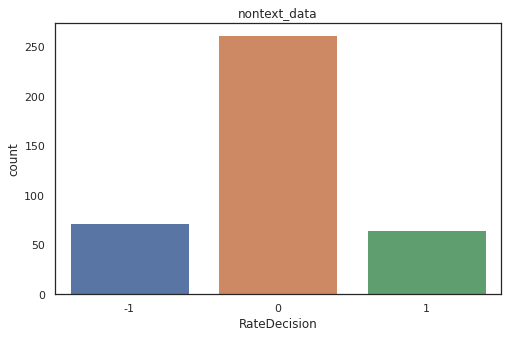

In [ ]:
# The number of data per Target Labels
x = nontext_data['RateDecision'].value_counts()
print("Count: ")
print(x)
print("Percent: ")
print(round(x/sum(x) * 100))
# sns.barplot(x.index, x)
# plt.gca().set_ylabel('number of samples')
plt.figure(figsize=(8,5))
ax = sns.countplot(x='RateDecision', data=nontext_data)
ax.set_title('nontext_data')

Highly imbalanced to 0 (hold), so need to consider this point. Always predicting 0 (hold) will result in the accuracy of more than 60%. 

## Correlation

In [ ]:
nontext_data.columns.values

array(['unscheduled', 'forecast', 'confcall', 'ChairPerson', 'Rate',
       'RateDiff', 'RateDecision', 'RateChanged', 'GDP_date', 'GDP_value',
       'GDP_diff_prev', 'GDP_diff_year', 'GDPPOT_date', 'GDPPOT_value',
       'GDPPOT_diff_prev', 'GDPPOT_diff_year', 'PCE_date', 'PCE_value',
       'PCE_diff_prev', 'PCE_diff_year', 'CPI_date', 'CPI_value',
       'CPI_diff_prev', 'CPI_diff_year', 'Unemp_date', 'Unemp_value',
       'Unemp_diff_prev', 'Unemp_diff_year', 'Employ_date',
       'Employ_value', 'Employ_diff_prev', 'Employ_diff_year', 'PMI_date',
       'PMI_value', 'PMI_diff_prev', 'PMI_diff_year', 'NMI_date',
       'NMI_value', 'NMI_diff_prev', 'NMI_diff_year', 'Rsales_date',
       'Rsales_value', 'Rsales_diff_prev', 'Rsales_diff_year',
       'Hsales_date', 'Hsales_value', 'Hsales_diff_prev',
       'Hsales_diff_year', 'Taylor', 'Balanced', 'Inertia', 'Taylor-Rate',
       'Balanced-Rate', 'Inertia-Rate', 'Taylor_diff', 'Balanced_diff',
       'Inertia_diff', 'prev_decision'

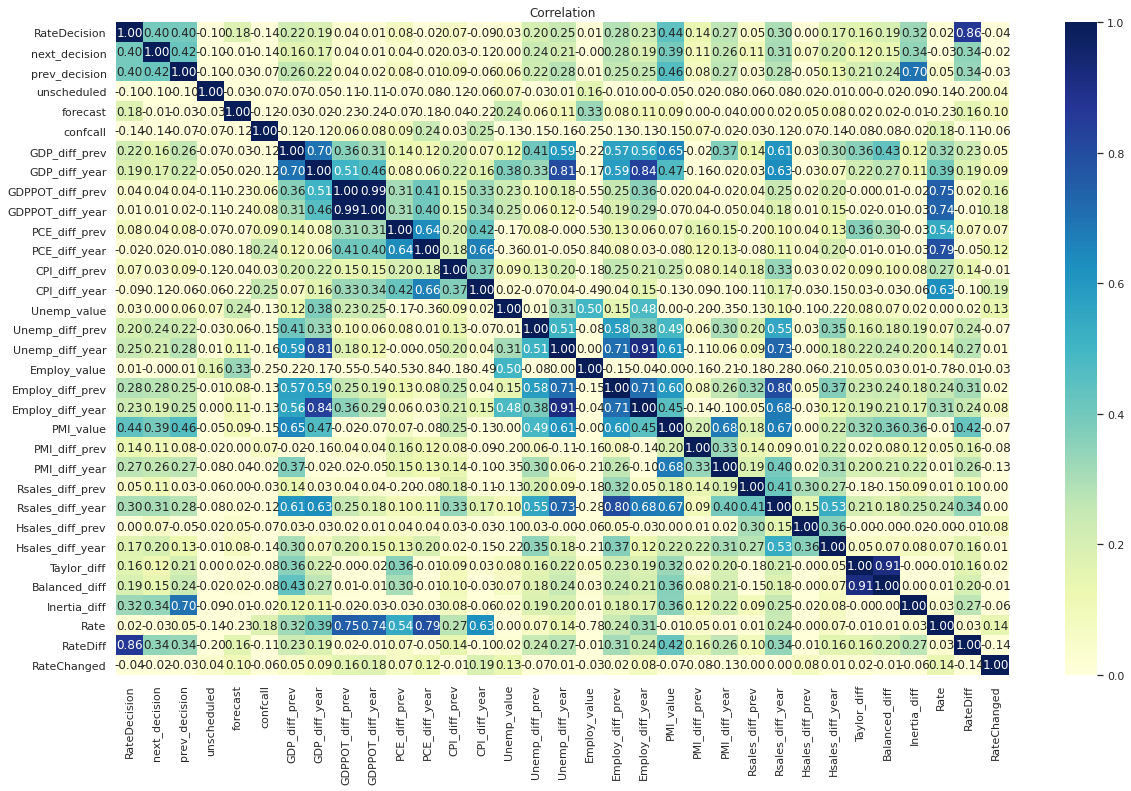

In [ ]:
# Per document type
corr_columns = ['RateDecision', 'next_decision', 'prev_decision', 'unscheduled', 'forecast', 'confcall', 
                'GDP_diff_prev', 'GDP_diff_year', 'GDPPOT_diff_prev', 'GDPPOT_diff_year',
                'PCE_diff_prev', 'PCE_diff_year', 'CPI_diff_prev', 'CPI_diff_year', 
                'Unemp_value', 'Unemp_diff_prev', 'Unemp_diff_year',
                'Employ_value', 'Employ_diff_prev', 'Employ_diff_year',
                'PMI_value', 'PMI_diff_prev', 'PMI_diff_year', 
                'Rsales_diff_prev', 'Rsales_diff_year', 'Hsales_diff_prev', 'Hsales_diff_year',
                'Taylor_diff', 'Balanced_diff', 'Inertia_diff', 'Rate', 'RateDiff', 'RateChanged']

fig, ax = plt.subplots(1, 1, figsize=(20, 12))

sns.heatmap(nontext_data[corr_columns].astype(float).corr(), cmap="YlGnBu", annot=True, fmt=".2f", vmin=0, vmax=1, ax=ax)
ax.set_title("Correlation")
plt.show()

Observation on the correlation:

Higher correlation with Rate Decision:
 * 'GDP_diff_prev'
 * 'Unemp_diff_year'
 * 'Employ_diff_prev'
 * 'PMI_value'
 * 'Rsales_diff_year'
 * 'Hsales_diff_year'
 * 'prev_decision'
 * 'Taylor_diff'
 * 'Balanced_diff'
 * 'Inertia_diff'

Low correlation with Rate Decision:
 *  'unscheduled' - correlation is small
 * 'forecast' - logically not related
 * 'confcall' - correlation is small
 * 'GDP_diff_year' - use GDP_diff_prev instead, which highly correlate to this
 * 'GDPPOT_diff_prev' - correlation is small
 * 'GDPPOT_diff_year' - correlation is small
 * 'PCE_diff_prev' - correlation is small
 * 'PCE_diff_year' - correlation is small
 * 'CPI_diff_prev' - correlation is small
 * 'CPI_diff_year' - correlation is small
 * 'Unemp_value' - correlation is small
 * 'Unemp_diff_prev' - use Unemp_diff_year instead, which highly correlate to this
 * 'Employ_value' - correlation is small
 * 'Employ_diff_year' - use Employ_diff_prev instead, which highly correlate to this
 * 'PMI_diff_prev' - correlation is small
 * 'PMI_diff_year' - correlation is small
 * 'Rsales_diff_prev' - correlation is small
 * 'Rsales_diff_year' - correlation is small
 * 'Hsales_diff_prev' - correlation is small
 * 'Hsales_diff_year' - correlation is small
 * 'next_decision' - this was added to see whether there's any meaningful correlation from previous period

Will create two dataset, one full set and the other smaller set with high correlation

### Moving average

In [ ]:
corr_columns = ['RateDecision',
                'GDP_diff_prev', 'GDP_diff_year', 'GDPPOT_diff_prev', 'GDPPOT_diff_year',
                'PCE_diff_prev', 'PCE_diff_year', 'CPI_diff_prev', 'CPI_diff_year', 
                'Unemp_value', 'Unemp_diff_prev', 'Unemp_diff_year',
                'Employ_value', 'Employ_diff_prev', 'Employ_diff_year',
                'PMI_value', 'PMI_diff_prev', 'PMI_diff_year', 
                'Rsales_diff_prev', 'Rsales_diff_year', 'Hsales_diff_prev', 'Hsales_diff_year',
                'Taylor_diff', 'Balanced_diff', 'Inertia_diff', 'Taylor-Rate', 'Balanced-Rate', 'Inertia-Rate']

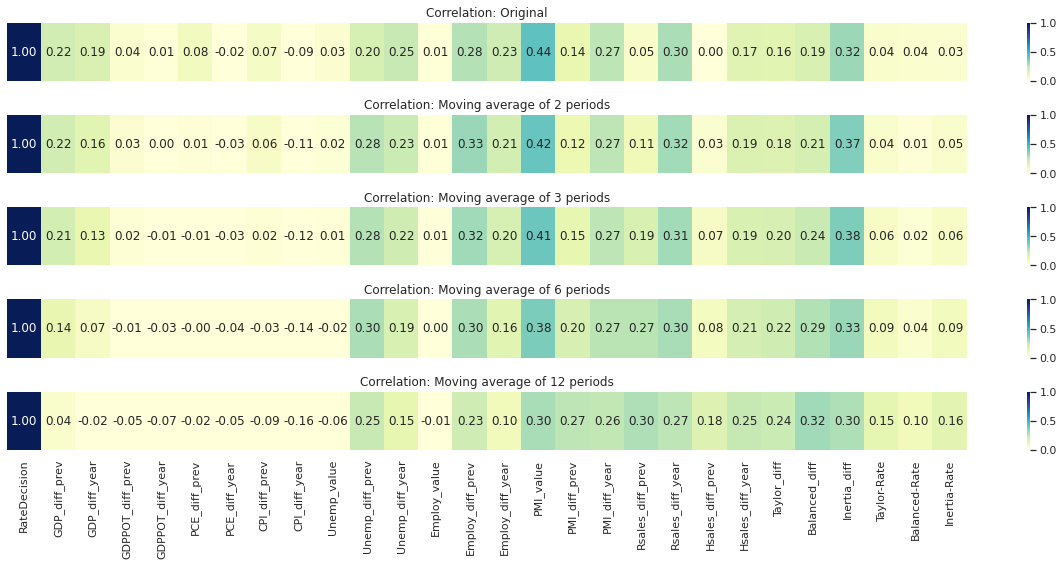

In [ ]:
# Moving average (window = 2)
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(17,8))

sns.heatmap(nontext_data[corr_columns].astype(float).corr().iloc[:1], cmap="YlGnBu", annot=True, fmt=".2f", vmin=0, vmax=1, ax=ax1)
ax1.set_title("Correlation: Original")
ax1.set_xticks([])
ax1.set_yticks([])
sns.heatmap(nontext_ma2[corr_columns].astype(float).corr().iloc[:1], cmap="YlGnBu", annot=True, fmt=".2f", vmin=0, vmax=1, ax=ax2)
ax2.set_title("Correlation: Moving average of 2 periods")
ax2.set_xticks([])
ax2.set_yticks([])
sns.heatmap(nontext_ma3[corr_columns].astype(float).corr().iloc[:1], cmap="YlGnBu", annot=True, fmt=".2f", vmin=0, vmax=1, ax=ax3)
ax3.set_title("Correlation: Moving average of 3 periods")
ax3.set_xticks([])
ax3.set_yticks([])
sns.heatmap(nontext_ma6[corr_columns].astype(float).corr().iloc[:1], cmap="YlGnBu", annot=True, fmt=".2f", vmin=0, vmax=1, ax=ax4)
ax4.set_title("Correlation: Moving average of 6 periods")
ax4.set_xticks([])
ax4.set_yticks([])
sns.heatmap(nontext_ma12[corr_columns].astype(float).corr().iloc[:1], cmap="YlGnBu", annot=True, fmt=".2f", vmin=0, vmax=1, ax=ax5)
ax5.set_title("Correlation: Moving average of 12 periods")
ax5.set_yticks([])

fig.tight_layout(pad=1.0)
plt.show()


Not much improvement. The followings can be used:
 * Unemp_diff_prev for previous 3 period
 * Emp_diff_prev for previous 2 period
 * Rsales_diff_year for previous 2 period
 * Hsales_diff_year for previous 12 period
 * Balanced_diff for previous 12 period
 * Intertia_diff for previous 3 period

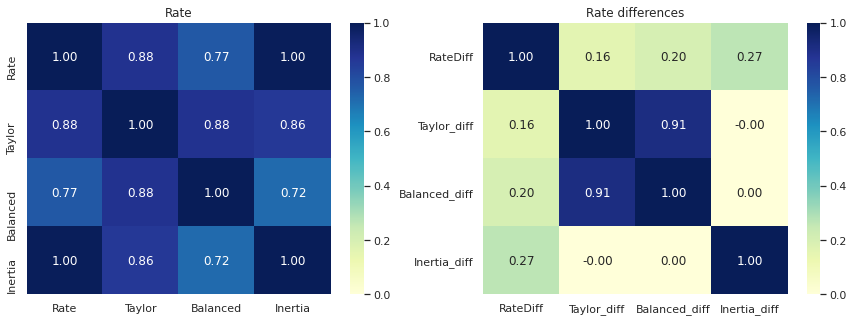

In [ ]:
# Correlation between Taylor rule and actual rates are quite high

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

corr_columns = ['Rate', 'Taylor', 'Balanced', 'Inertia']
sns.heatmap(nontext_data[corr_columns].astype(float).corr(), cmap="YlGnBu", annot=True, fmt=".2f", vmin=0, vmax=1, ax=ax1)
ax1.set_title("Rate")

corr_columns = ['RateDiff', 'Taylor_diff', 'Balanced_diff', 'Inertia_diff']
sns.heatmap(nontext_data[corr_columns].astype(float).corr(), cmap="YlGnBu", annot=True, fmt=".2f", vmin=0, vmax=1, ax=ax2)
ax2.set_title("Rate differences")

plt.show()

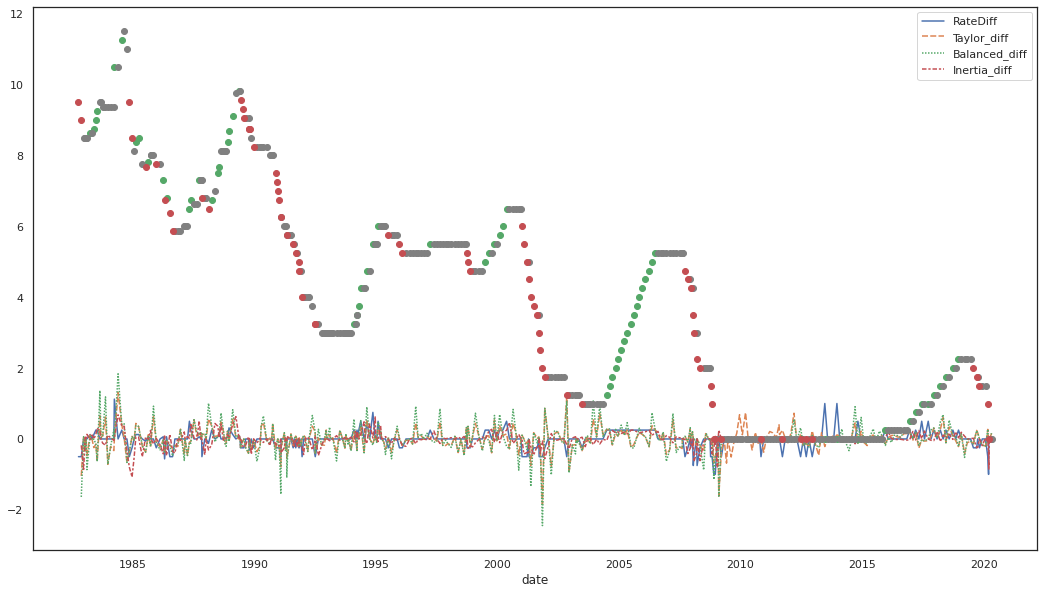

In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.lineplot(data=nontext_data[corr_columns], ax=ax)

decision_raise = nontext_data.loc[nontext_data['RateDecision'] == 1]
decision_hold = nontext_data.loc[nontext_data['RateDecision'] == 0]
decision_lower = nontext_data.loc[nontext_data['RateDecision'] == -1]

ax.plot(decision_raise.index.values, decision_raise['Rate'], 'o', color="g", label="Raise")
ax.plot(decision_hold.index.values, decision_hold['Rate'], 'o', color="grey", label="Hold")
ax.plot(decision_lower.index.values, decision_lower['Rate'], 'o', color="r", label="Lower")


### Check individual columns

In [ ]:
def plot_distribution(df, columns):
    for col in columns:        
        fig, ax = plt.subplots(figsize=(10, 5))
        g = sns.kdeplot(df[col][(df["RateDecision"] == -1) & (df[col].notnull())], color="Red", shade=True)
        g = sns.kdeplot(df[col][(df["RateDecision"] == 0) & (df[col].notnull())], ax=g, color="Blue", shade=True)
        g = sns.kdeplot(df[col][(df["RateDecision"] == 1) & (df[col].notnull())], ax=g, color="Green", shade=True)
        g.set_xlabel(col)
        g.set_ylabel("Frequency")
        g.set_title("Distribution for " + col, fontsize=14)
        g = g.legend(["Lower", "Hold", "Raise"])
        
        g = sns.FacetGrid(df, col='RateDecision', height=3, aspect=1)
        g.map(sns.distplot, col)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

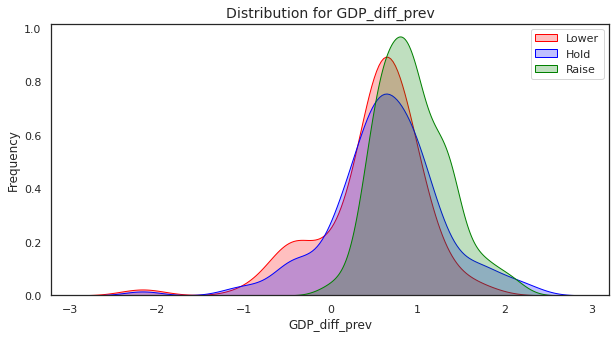

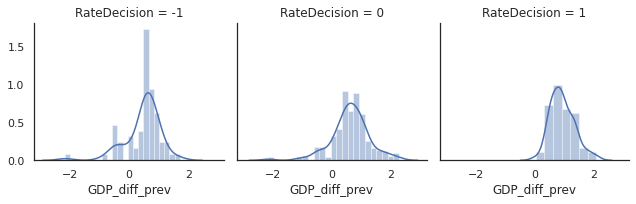

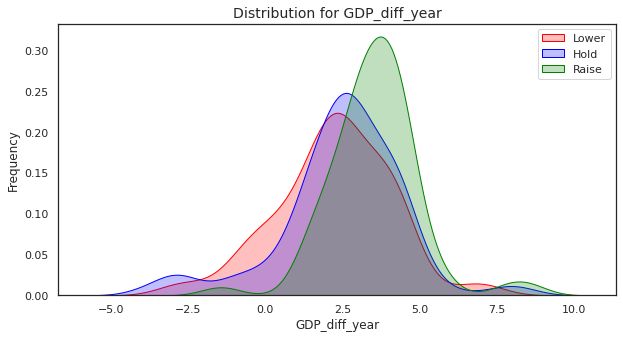

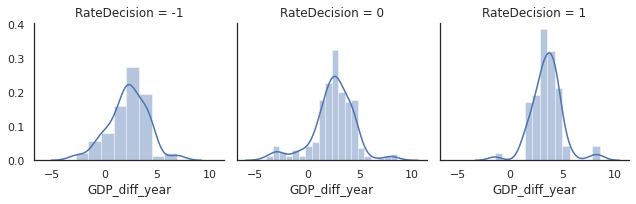

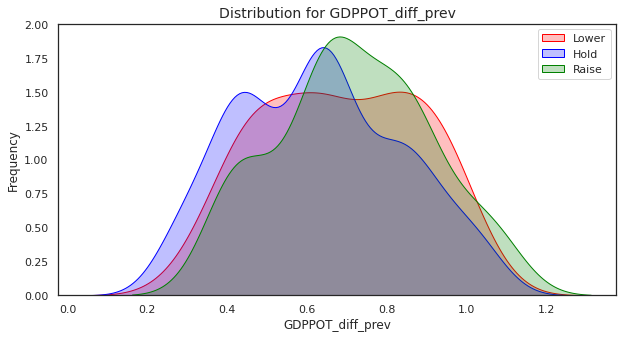

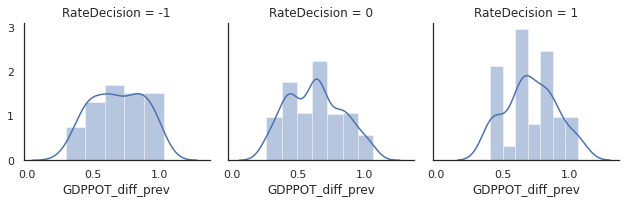

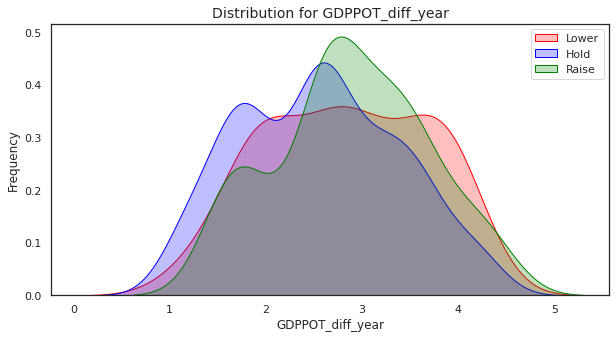

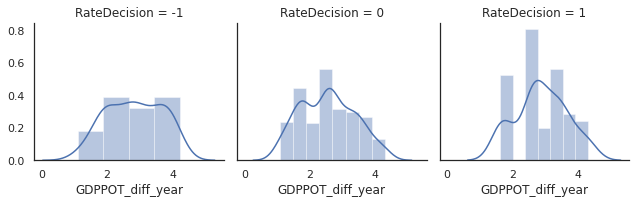

In [ ]:
plot_distribution(nontext_data, ["GDP_diff_prev", "GDP_diff_year", "GDPPOT_diff_prev", "GDPPOT_diff_year"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

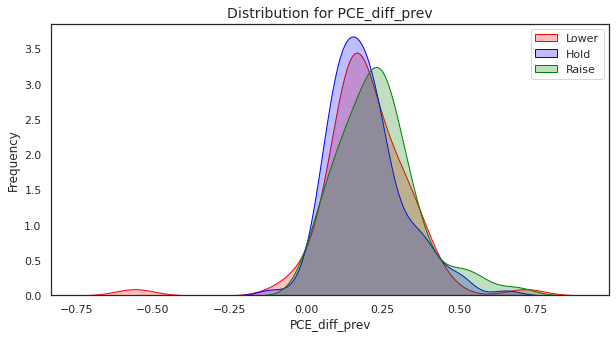

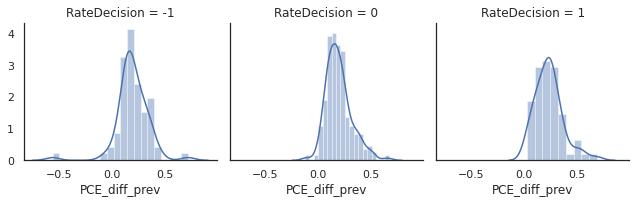

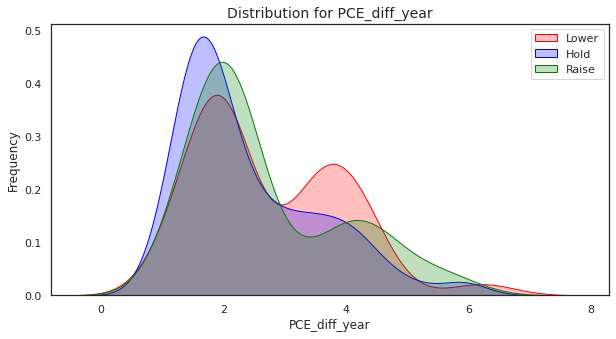

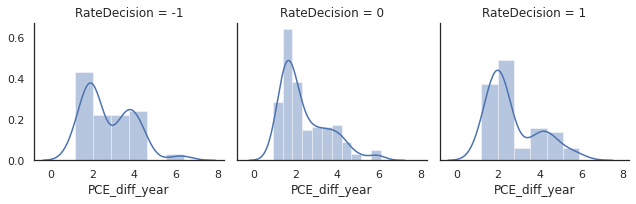

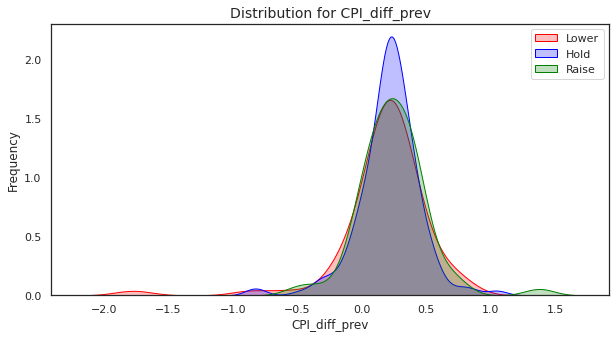

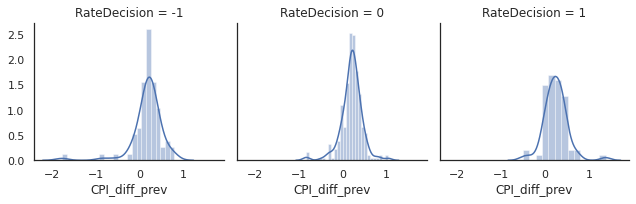

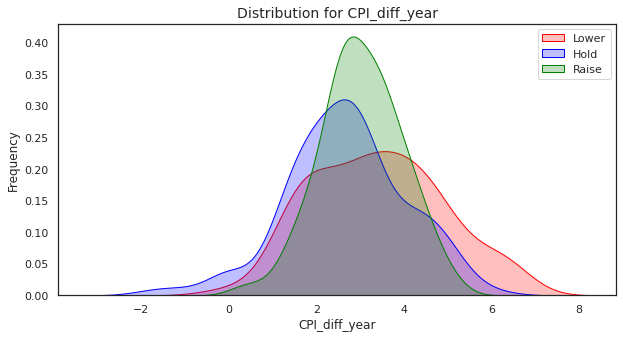

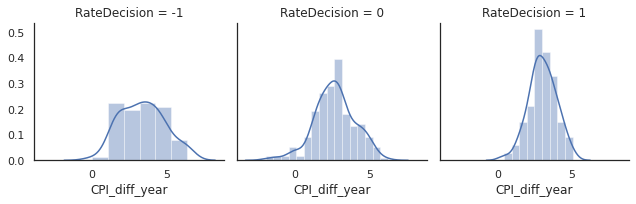

In [ ]:
plot_distribution(nontext_data, ["PCE_diff_prev", "PCE_diff_year", "CPI_diff_prev", "CPI_diff_year"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

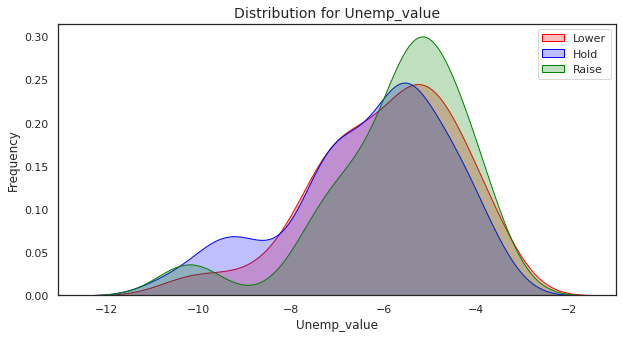

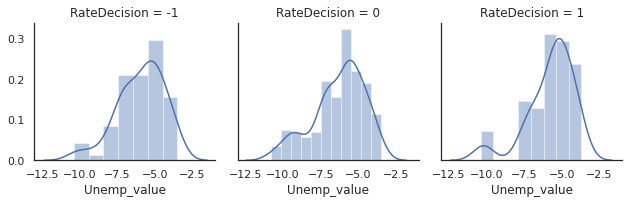

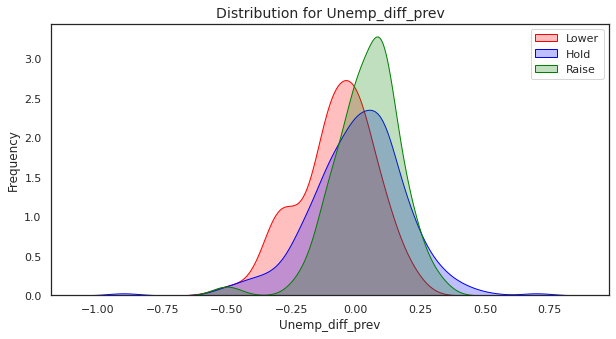

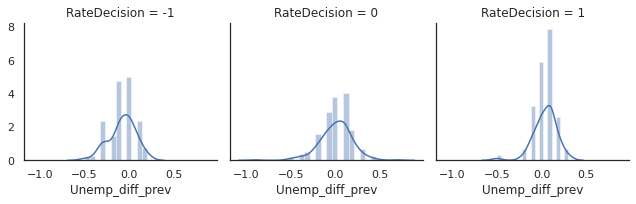

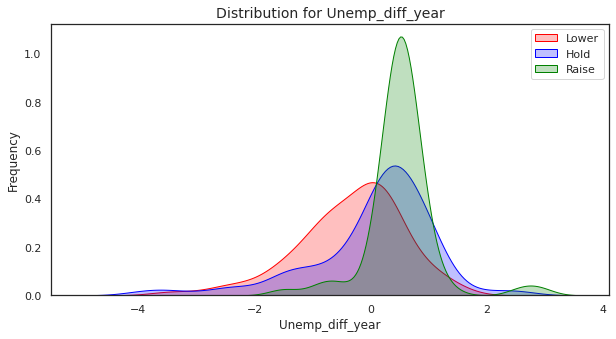

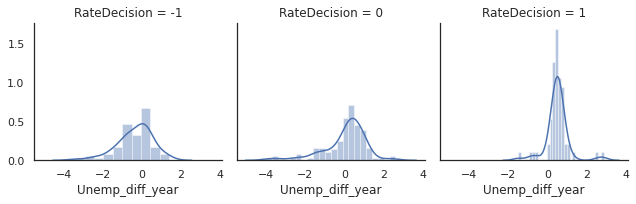

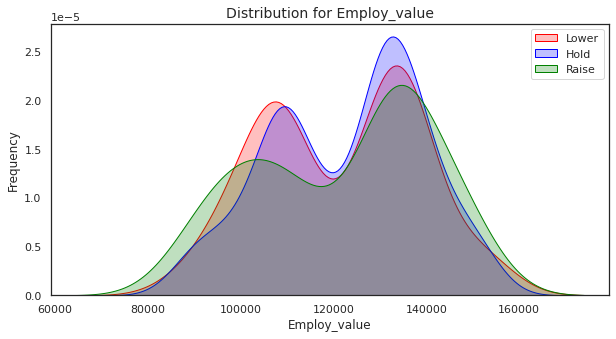

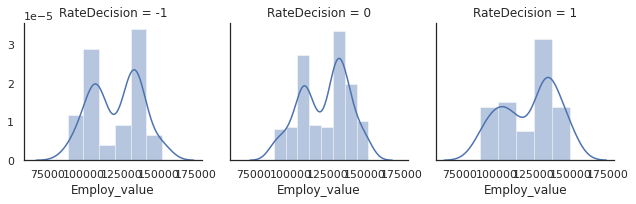

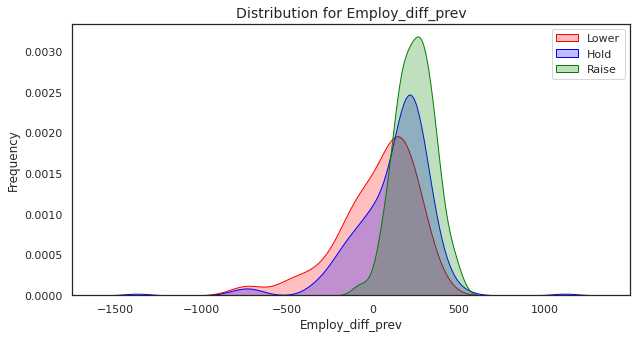

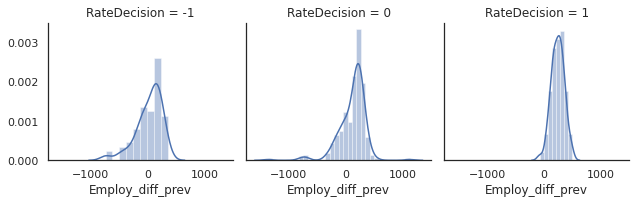

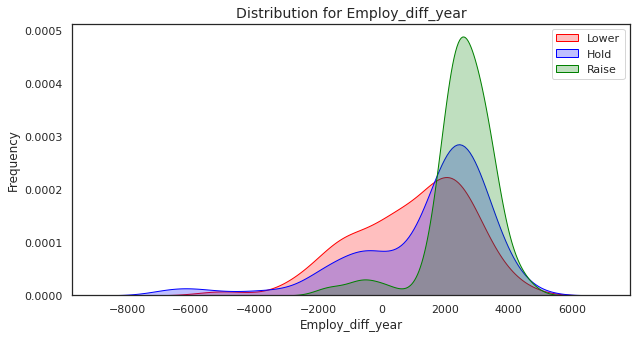

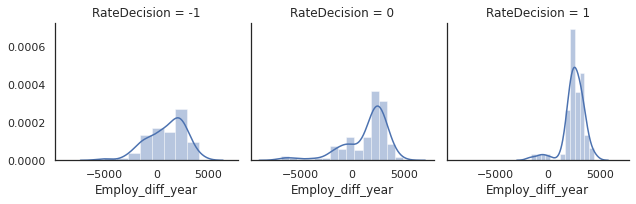

In [ ]:
plot_distribution(nontext_data, ["Unemp_value", "Unemp_diff_prev", "Unemp_diff_year", "Employ_value", "Employ_diff_prev", "Employ_diff_year"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

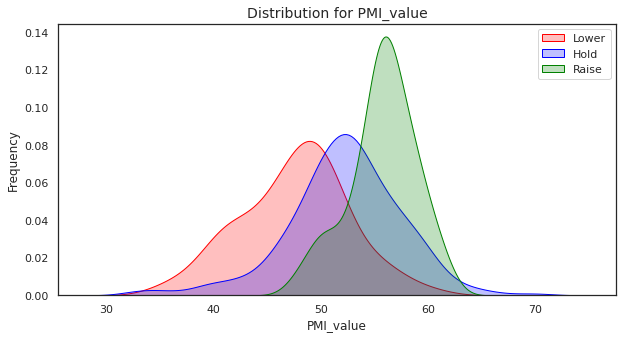

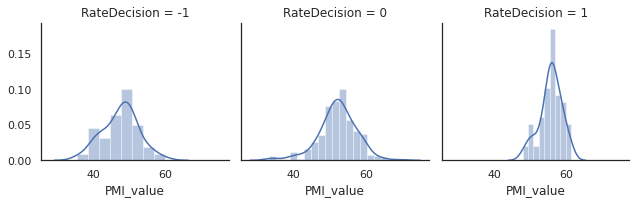

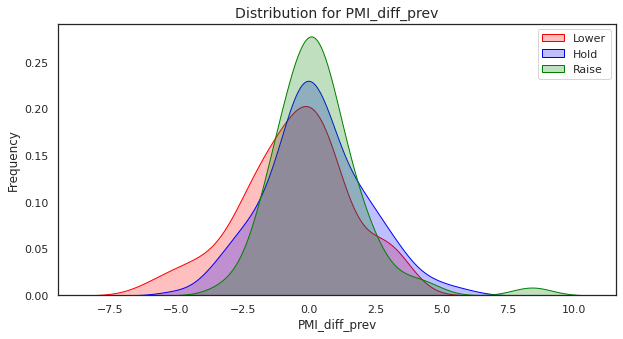

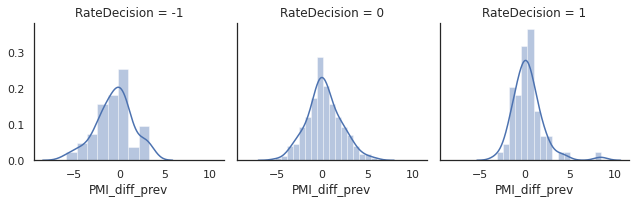

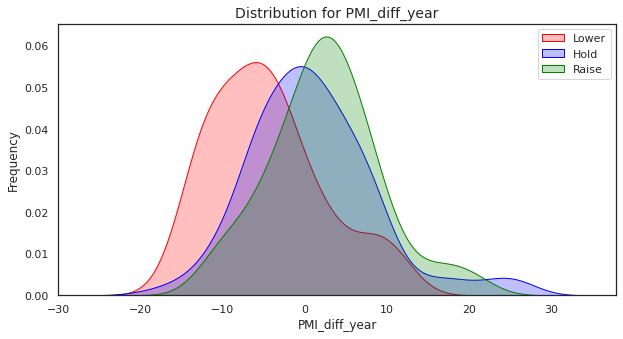

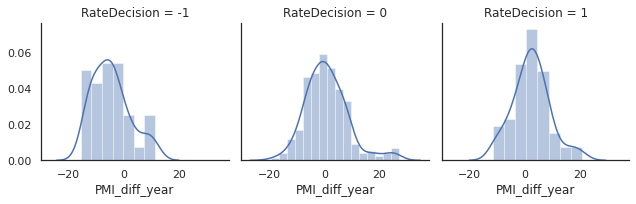

In [ ]:
plot_distribution(nontext_data, ["PMI_value", "PMI_diff_prev", "PMI_diff_year"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

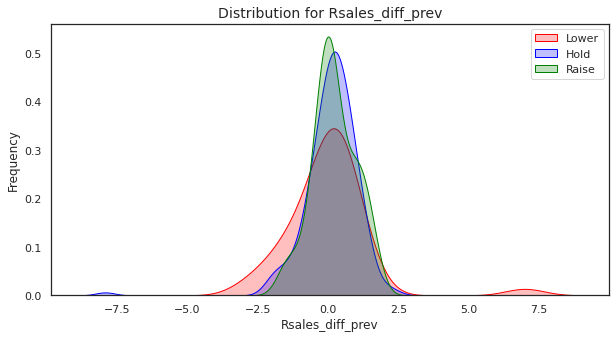

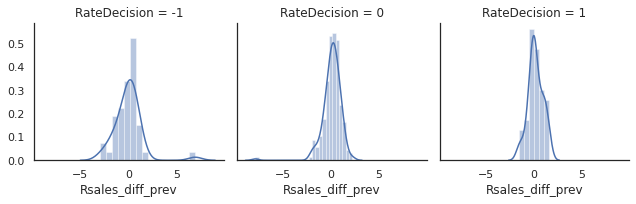

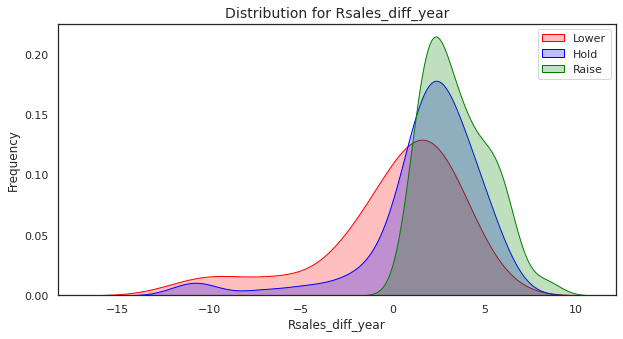

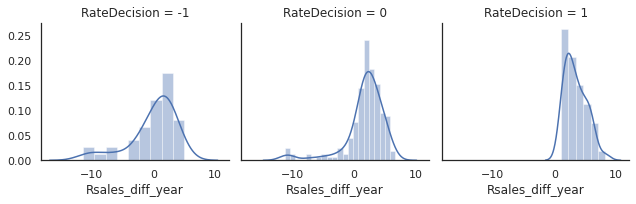

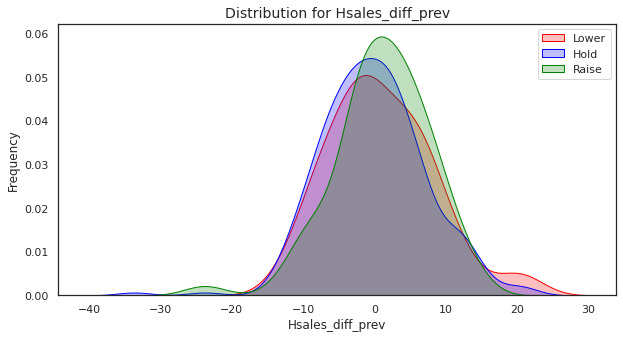

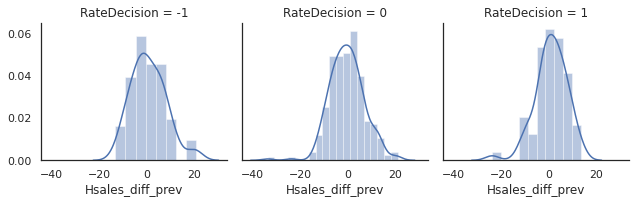

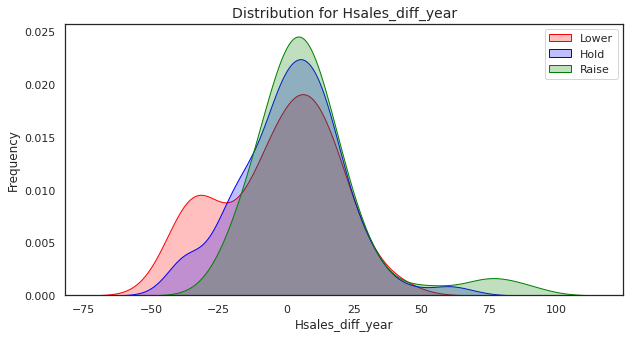

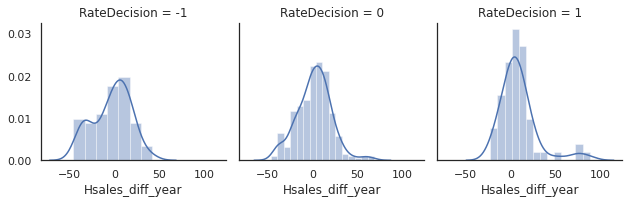

In [ ]:
plot_distribution(nontext_data, ["Rsales_diff_prev", "Rsales_diff_year", "Hsales_diff_prev", "Hsales_diff_year"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

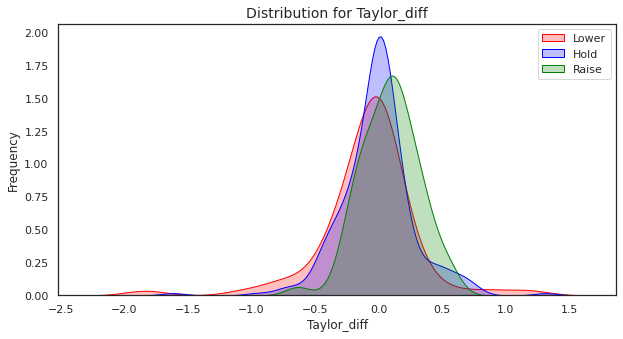

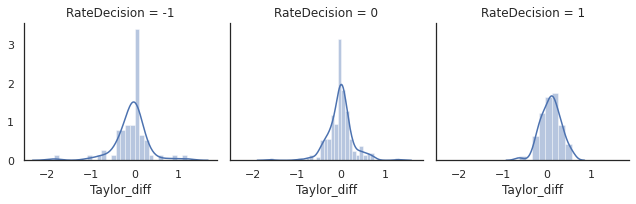

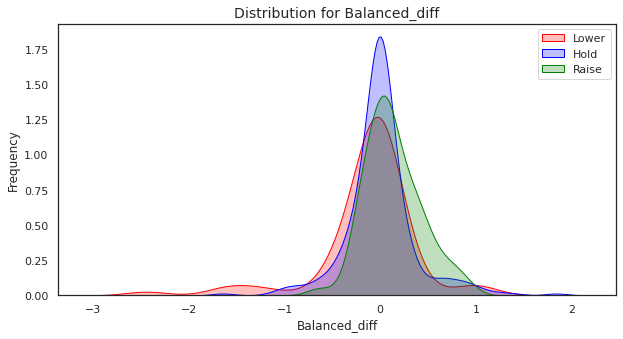

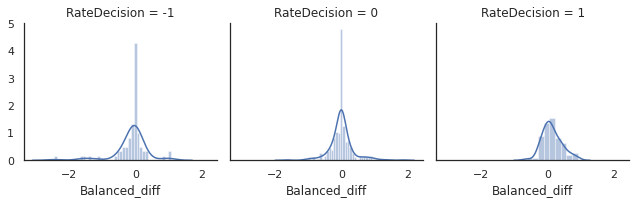

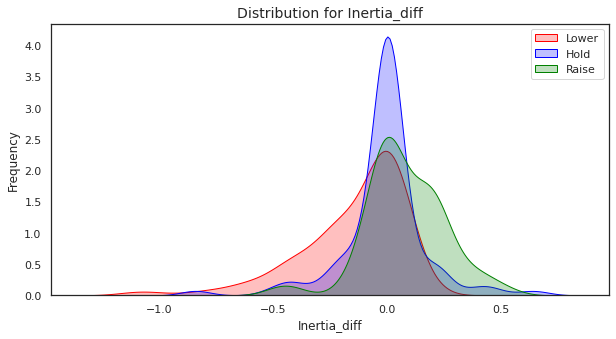

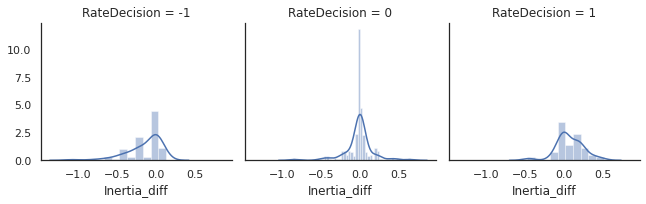

In [ ]:
plot_distribution(nontext_data, ["Taylor_diff", "Balanced_diff", "Inertia_diff"])

## Create Training Data Set

In [ ]:
nontext_train_small = pd.concat([nontext_data[['RateDecision', 'prev_decision', 'GDP_diff_prev', 'PMI_value']],
                                 nontext_ma2[['Employ_diff_prev', 'Rsales_diff_year']], 
                                 nontext_ma3[['Unemp_diff_prev', 'Inertia_diff']], 
                                 nontext_ma12[['Hsales_diff_year', 'Balanced_diff']]], axis=1)
nontext_train_small.rename(columns={'RateDecision': 'target'}, inplace=True)

In [ ]:
nontext_train_small.isnull().sum()

target                0
prev_decision         1
GDP_diff_prev         0
PMI_value             0
Employ_diff_prev      0
Rsales_diff_year    131
Unemp_diff_prev       0
Inertia_diff          4
Hsales_diff_year      0
Balanced_diff        15
dtype: int64

In [ ]:
# Large dataset to include all the latest figures plus 3 months rolling average

latest_columns = ['RateDecision', 
                  'prev_decision',
                  'GDP_diff_prev', 
                  'GDP_diff_year', 
                  'GDPPOT_diff_prev', 
                  'GDPPOT_diff_year', 
                  'PCE_diff_prev', 
                  'PCE_diff_year', 
                  'CPI_diff_prev', 
                  'CPI_diff_year', 
                  'Unemp_value', 
                  'Unemp_diff_prev', 
                  'Unemp_diff_year', 
                  'Employ_value', 
                  'Employ_diff_prev', 
                  'Employ_diff_year', 
                  'PMI_value', 
                  'PMI_diff_prev', 
                  'PMI_diff_year', 
                  'Rsales_diff_prev', 
                  'Rsales_diff_year', 
                  'Hsales_diff_prev', 
                  'Hsales_diff_year', 
                  'Taylor-Rate', 
                  'Balanced-Rate', 
                  'Inertia-Rate', 
                  'Taylor_diff', 
                  'Balanced_diff', 
                  'Inertia_diff']

ma3_columns = [
               'GDP_diff_prev', 
               'GDP_diff_year', 
               'GDPPOT_diff_prev', 
               'GDPPOT_diff_year', 
               'PCE_diff_prev', 
               'PCE_diff_year', 
               'CPI_diff_prev', 
               'CPI_diff_year', 
               'Unemp_value', 
               'Unemp_diff_prev', 
               'Unemp_diff_year', 
               'Employ_value', 
               'Employ_diff_prev', 
               'Employ_diff_year', 
               'PMI_value', 
               'PMI_diff_prev', 
               'PMI_diff_year', 
               'Rsales_diff_prev', 
               'Rsales_diff_year', 
               'Hsales_diff_prev', 
               'Hsales_diff_year', 
               'Taylor-Rate', 
               'Balanced-Rate', 
               'Inertia-Rate', 
               'Taylor_diff', 
               'Balanced_diff', 
               'Inertia_diff'
               ]

nontext_train_large = pd.concat([nontext_data[latest_columns], nontext_ma3[ma3_columns].add_suffix('_ma3')], axis=1)
nontext_train_large.rename(columns={'RateDecision': 'target'}, inplace=True)
print(nontext_data[latest_columns].shape)
print(nontext_ma3[ma3_columns].shape)
print(nontext_train_large.shape)

(398, 29)
(398, 27)
(398, 56)


In [ ]:
nontext_train_large.isnull().sum()

target                    0
prev_decision             1
GDP_diff_prev             0
GDP_diff_year             0
GDPPOT_diff_prev          0
GDPPOT_diff_year          0
PCE_diff_prev             0
PCE_diff_year             0
CPI_diff_prev             0
CPI_diff_year             0
Unemp_value               0
Unemp_diff_prev           0
Unemp_diff_year           0
Employ_value              0
Employ_diff_prev          0
Employ_diff_year          0
PMI_value                 0
PMI_diff_prev             0
PMI_diff_year             0
Rsales_diff_prev        117
Rsales_diff_year        129
Hsales_diff_prev          0
Hsales_diff_year          0
Taylor-Rate               0
Balanced-Rate             0
Inertia-Rate              0
Taylor_diff               1
Balanced_diff             1
Inertia_diff              1
GDP_diff_prev_ma3         0
GDP_diff_year_ma3         0
GDPPOT_diff_prev_ma3      0
GDPPOT_diff_year_ma3      0
PCE_diff_prev_ma3         0
PCE_diff_year_ma3         0
CPI_diff_prev_ma3   

### Missing Values

In [ ]:
# As most likely the decision is 0 (hold), fill prev_decision of the first row
nontext_train_small['prev_decision'].fillna(0, inplace=True)
nontext_train_large['prev_decision'].fillna(0, inplace=True)

(0.0, 400.0)

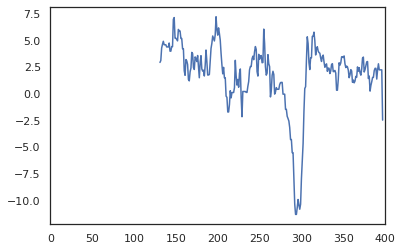

In [ ]:
ax = sns.lineplot(data=nontext_train_small['Rsales_diff_year'].values)
ax.set_xlim(0, 400)

(0.0, 400.0)

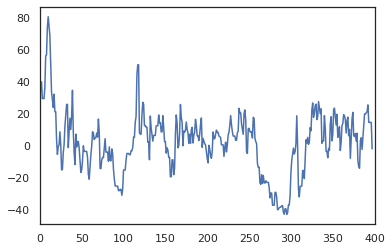

In [ ]:
ax = sns.lineplot(data=nontext_ma2['Hsales_diff_year'].values)
ax.set_xlim(0, 400)

In [ ]:
# Retail sales growth ratio is difficult to estimate. Though it is not ideal, simply use the average
nontext_train_small['Rsales_diff_year'].fillna(nontext_train_small['Rsales_diff_year'].mean(), inplace=True)
nontext_train_large['Rsales_diff_prev'].fillna(nontext_train_large['Rsales_diff_prev'].mean(), inplace=True)
nontext_train_large['Rsales_diff_year'].fillna(nontext_train_large['Rsales_diff_year'].mean(), inplace=True)

nontext_train_small['Inertia_diff'].fillna(nontext_train_small['Inertia_diff'].mean(), inplace=True)
nontext_train_small['Balanced_diff'].fillna(nontext_train_small['Balanced_diff'].mean(), inplace=True)
nontext_train_large['Inertia_diff'].fillna(nontext_train_large['Inertia_diff'].mean(), inplace=True)
nontext_train_large['Balanced_diff'].fillna(nontext_train_large['Balanced_diff'].mean(), inplace=True)
nontext_train_large['Taylor_diff'].fillna(nontext_train_large['Taylor_diff'].mean(), inplace=True)

nontext_train_large['Rsales_diff_prev_ma3'].fillna(nontext_train_large['Rsales_diff_prev_ma3'].mean(), inplace=True)
nontext_train_large['Rsales_diff_year_ma3'].fillna(nontext_train_large['Rsales_diff_year_ma3'].mean(), inplace=True)

nontext_train_large['Inertia_diff_ma3'].fillna(nontext_train_large['Inertia_diff_ma3'].mean(), inplace=True)
nontext_train_large['Balanced_diff_ma3'].fillna(nontext_train_large['Balanced_diff_ma3'].mean(), inplace=True)
nontext_train_large['Taylor_diff_ma3'].fillna(nontext_train_large['Taylor_diff_ma3'].mean(), inplace=True)
nontext_train_large['Inertia-Rate_ma3'].fillna(nontext_train_large['Inertia-Rate_ma3'].mean(), inplace=True)
nontext_train_large['Balanced-Rate_ma3'].fillna(nontext_train_large['Balanced-Rate_ma3'].mean(), inplace=True)
nontext_train_large['Taylor-Rate_ma3'].fillna(nontext_train_large['Taylor-Rate_ma3'].mean(), inplace=True)


In [ ]:
nontext_train_small.isnull().sum()

target              0
prev_decision       0
GDP_diff_prev       0
PMI_value           0
Employ_diff_prev    0
Rsales_diff_year    0
Unemp_diff_prev     0
Inertia_diff        0
Hsales_diff_year    0
Balanced_diff       0
dtype: int64

In [ ]:
nontext_train_large.isnull().sum()

target                  0
prev_decision           0
GDP_diff_prev           0
GDP_diff_year           0
GDPPOT_diff_prev        0
GDPPOT_diff_year        0
PCE_diff_prev           0
PCE_diff_year           0
CPI_diff_prev           0
CPI_diff_year           0
Unemp_value             0
Unemp_diff_prev         0
Unemp_diff_year         0
Employ_value            0
Employ_diff_prev        0
Employ_diff_year        0
PMI_value               0
PMI_diff_prev           0
PMI_diff_year           0
Rsales_diff_prev        0
Rsales_diff_year        0
Hsales_diff_prev        0
Hsales_diff_year        0
Taylor-Rate             0
Balanced-Rate           0
Inertia-Rate            0
Taylor_diff             0
Balanced_diff           0
Inertia_diff            0
GDP_diff_prev_ma3       0
GDP_diff_year_ma3       0
GDPPOT_diff_prev_ma3    0
GDPPOT_diff_year_ma3    0
PCE_diff_prev_ma3       0
PCE_diff_year_ma3       0
CPI_diff_prev_ma3       0
CPI_diff_year_ma3       0
Unemp_value_ma3         0
Unemp_diff_p

### One-hot encoding

In [ ]:
# nontext_train['Lower'] = nontext_train['RateDecision'].apply(lambda x: 1 if x == -1 else 0)
# nontext_train['Hold'] = nontext_train['RateDecision'].apply(lambda x: 1 if x == 0 else 0)
# nontext_train['Raise'] = nontext_train['RateDecision'].apply(lambda x: 1 if x == 1 else 0)
# nontext_train

# Save Data

In [ ]:
  def save_data(df, file_name, dir_name=train_dir):
    if not os.path.exists(dir_name):
      os.mkdir(dir_name)  
    # Save results to a .picke file
    file = open(dir_name + file_name + '.pickle', 'wb')
    pickle.dump(df, file)
    file.close()
    # Save results to a .csv file
    df.to_csv(dir_name + file_name + '.csv', index=True)

In [ ]:
# Save non-text data
save_data(nontext_train_small, 'nontext_train_small')
save_data(nontext_train_large, 'nontext_train_large')